In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

The heat bath algorithm for the Potts model

In [2]:
#boudary conditions
def bc_periodic(i, n): 
    return i % n

def bc_helical(i, j, n):
    if j>=n:
        new_i = (i-1)%n
        new_j = j%n
    elif j<0:
        new_i = (i+1)%n
        new_j = j%n
    else: 
        new_i = i%n
        new_j = j    
    return new_i, new_j

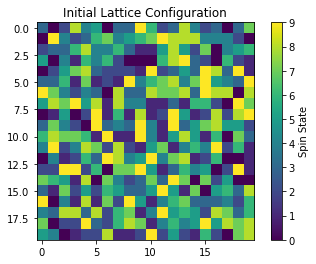

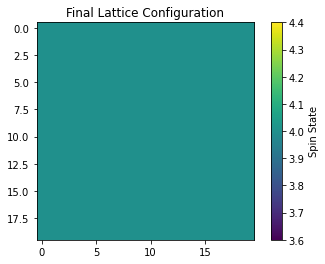

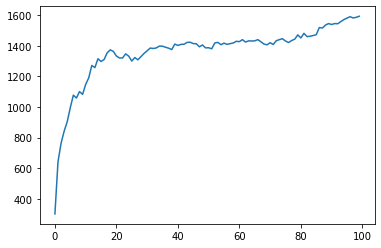

In [11]:
def initialize_lattice(N, q):
    """Initialize a random lattice of size N x N with q states."""
    return np.random.randint(0, q, size=(N, N))

def compute_energy(lattice, i, j, q, J=1):
    """Compute the energy of a spin in a Potts model with periodic boundary conditions."""
    N = lattice.shape[0]
    spin = q
    neighbors = [
        lattice[(i+1) % N, j],  # Right
        lattice[(i-1) % N, j],  # Left
        lattice[i, (j+1) % N],  # Up
        lattice[i, (j-1) % N]   # Down
    ]
    
    # Energy is -J times the number of neighbors in the same state
    energy = -J * sum([1 if spin == neighbor else 0 for neighbor in neighbors])
    return energy


#add a small array to store base values in order to make the algorithm faster and not caluclate exponential every time. 

def heatbath_update(lattice, q, beta, J=1):
    """Perform one Heatbath update for each spin in the lattice."""
    N = lattice.shape[0]
    total_energy =0
    for i in range(N):
        for j in range(N):
            # Compute the energies for all possible states
            energies = np.zeros(q)
            for s_prime in range(q):
                energies[s_prime] = compute_energy(lattice, i, j, s_prime)
                if s_prime == lattice[i, j]:
                    total_energy -= energies[s_prime]
            
            # Compute probabilities for each state
            probabilities = (1/N*N*q) * np.exp(-beta * energies)
            probabilities /= np.sum(probabilities)
            
            # Choose a new spin state according to the probabilities
            new_spin = np.random.choice(q, p=probabilities)
            lattice[i, j] = new_spin

    return lattice, total_energy

# Parameters
N = 20      # Size of the lattice (N x N)
q = 10       # Number of possible spin states (q-state Potts model)
T = 0.5     # Temperature
beta = 1/T   # Inverse temperature (1 / k_B T)
J = 1        # Interaction strength (J)

# Initialize lattice
lattice = initialize_lattice(N, q)

plt.imshow(lattice, cmap='viridis')
plt.colorbar(label="Spin State")
plt.title("Initial Lattice Configuration")
plt.show()

# Perform Heatbath update for a number of sweeps
num_sweeps = 100
energies = []
for sweep in range(num_sweeps):
    lattice, energy = heatbath_update(lattice, q, beta, J)
    energies.append(energy)

# Optionally, visualize the result

plt.imshow(lattice, cmap='viridis')
plt.colorbar(label="Spin State")
plt.title("Final Lattice Configuration")
plt.show()

plt.plot(energies)


that When the temperature is low the system will tend to minimize the energy, and the spins will align in a way that minimizes the energy. When the temperature is high, the spins will be more random and the energy will be higher.

It takes a few sweeps for the system to reach equilibrium, and the energy will fluctuate around the equilibrium value. It generally reaches equilibrium pretty quickly but needs way more time in order to reach the minimal energy state (the graph is just upside down to make it more visually clear).

-1